# This file contains three diff models: One with just race (from FL dataset), one with just our generated ethnicity, one with both

In [1]:
import pandas as pd
import numpy as np
import datetime as DT

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn.apionly as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as Linear
from bs4 import BeautifulSoup
import urllib
import sys
import numpy as np
import pandas as pd
import matplotlib
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
import collections
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn import ensemble
#import pydotplus
#import io
import collections
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.patches as patches

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
reg = pd.read_csv("age_dataset_new_predictors_removed_abstain.csv", sep=",")

In [51]:
print(reg.columns, reg.isnull().sum(axis=0).tolist())

Index(['Unnamed: 0', 'Unnamed: 0.1', 'FIRST_NAME', 'GEN16', 'LAST_NAME',
       'district', 'dob', 'electiondate', 'female', 'id', 'party', 'regyear',
       'typeofvote', 'zip', 'Ethnicity Prediction', 'Unnamed: 0.1.1', '2', '3',
       '4', '19', 'Prediction Score', 'Conservative Ethnicity Prediction',
       'Race (Prior)'],
      dtype='object') [0, 0, 2, 0, 2, 0, 431, 16297, 10, 0, 0, 0, 16297, 5, 0, 0, 0, 2, 2, 0, 0, 0, 0]


reg.head()
data = reg
from dateutil.relativedelta import relativedelta
#Add an age column
data['age'] = data.apply(lambda _: '', axis=1)
nan_count = 0
now = now = DT.datetime.now()

for i ,dob in enumerate(data['dob']):
    if (str(dob) == 'nan'):
        print(i)
        print(dob)
        nan_count += 1  
    else:
        data['dob'][i+1] = DT.datetime.strptime(str(dob), "%m/%d/%Y")
        rdelta = relativedelta(now,data['dob'][i+1])
        data['age'][i+1] = rdelta.years

In [48]:


reg = data

In [37]:
#data.to_csv('age_dataset_new_predictors.csv', sep='\t')

In [49]:
remove = ['FIRST_NAME', 'LAST_NAME']

#remove = ['dob', 'electiondate', 'id', 'typeofvote', 'zip']
        
reg.drop(remove, axis = 1, inplace = True)


ValueError: labels ['FIRST_NAME' 'LAST_NAME'] not contained in axis

In [40]:
#del reg['Unnamed: 0']
#del reg['Unnamed: 0.1']
print(reg.columns, reg.isnull().sum(axis=0).tolist())

Index(['Unnamed: 0', 'Unnamed: 0.1', 'GEN16', 'district', 'dob',
       'electiondate', 'female', 'id', 'party', 'regyear', 'typeofvote', 'zip',
       'Ethnicity Prediction', 'Unnamed: 0.1.1', '2', '3', '4', '19',
       'Prediction Score', 'Conservative Ethnicity Prediction', 'Race (Prior)',
       'age'],
      dtype='object') [0, 0, 0, 0, 3, 16297, 10, 0, 0, 0, 16297, 5, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]


In [41]:
no_abstain = reg[reg['Conservative Ethnicity Prediction']!= "Abstain"]

In [43]:
#no_abstain.to_csv('age_dataset_new_predictors_removed_abstain.csv', sep='\t')

In [54]:
reg = pd.read_csv("age_dataset_new_predictors_removed_abstain.csv", sep='\t')

In [55]:
no_abstain = reg
no_abstain.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'GEN16', 'district',
       'dob', 'electiondate', 'female', 'id', 'party', 'regyear', 'typeofvote',
       'zip', 'Ethnicity Prediction', 'Unnamed: 0.1.1.1', '2', '3', '4', '19',
       'Prediction Score', 'Conservative Ethnicity Prediction', 'Race (Prior)',
       'age'],
      dtype='object')

In [56]:
no_abstain.columns
remove = ['Unnamed: 0', 'dob', 'electiondate', 'id', 'Unnamed: 0.1', 'regyear', 'typeofvote', 'zip','Unnamed: 0.1.1', 'Ethnicity Prediction', 'Unnamed: 0.1.1', '2', '3', '4', '19',
       'Prediction Score']
no_abstain.drop(remove, axis = 1, inplace = True)


In [59]:
del no_abstain["Unnamed: 0.1.1.1"]

In [57]:

no_abstain.columns

Index(['GEN16', 'district', 'female', 'party', 'Unnamed: 0.1.1.1',
       'Conservative Ethnicity Prediction', 'Race (Prior)', 'age'],
      dtype='object')

In [60]:
no_abstain['femaleis1'] = 0

no_abstain.loc[(no_abstain['female'] == "F"),'femaleis1'] = "1"
del no_abstain["female"]

In [61]:
no_abstain.head()
no_abstain.columns

Index(['GEN16', 'district', 'party', 'Conservative Ethnicity Prediction',
       'Race (Prior)', 'age', 'femaleis1'],
      dtype='object')

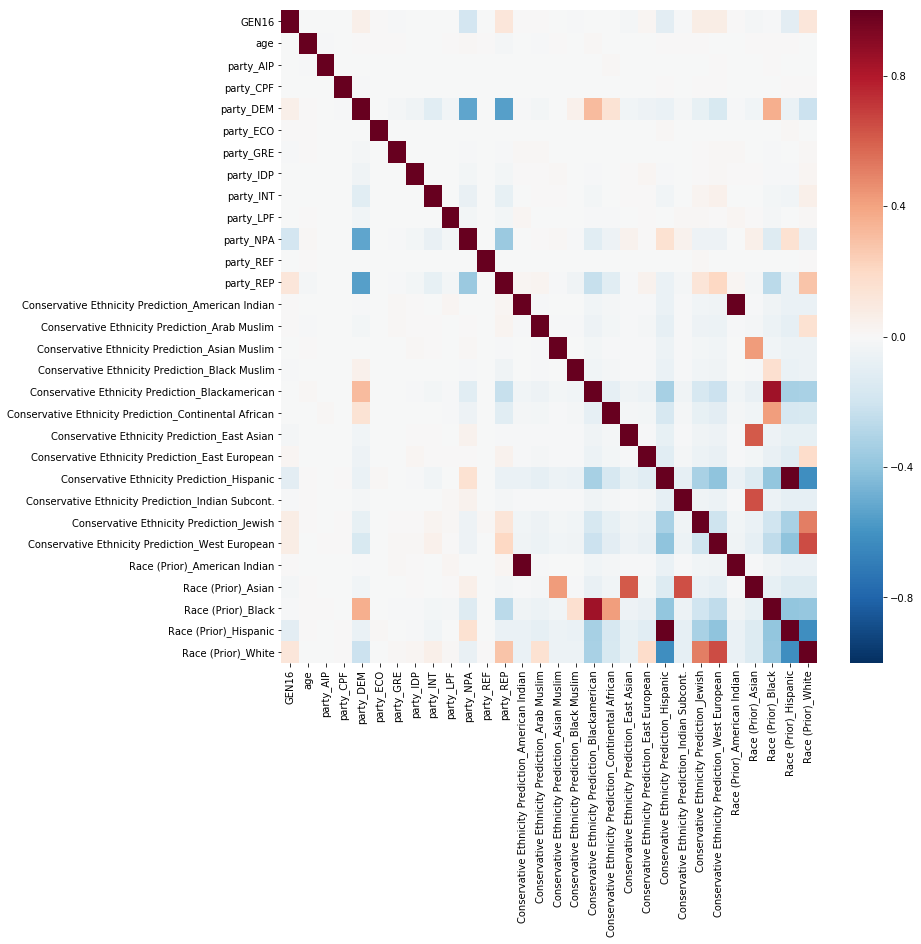

In [62]:
# get dummies
datamodel1 = pd.get_dummies(no_abstain, columns=['party', 'Conservative Ethnicity Prediction', 'Race (Prior)'])
#datamodel1 = pd.get_dummies(reg1, columns=['district','party', "Prediction", "Race"])

datamodel1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(datamodel1.corr())

# Back to creating an analysis

In [65]:
no_abstain.head()

,GEN16,district,party,Conservative Ethnicity Prediction,Race (Prior),age,femaleis1
0,1.0,BAK,REP,Jewish,White,43.0,0
1,1.0,DUV,NPA,Arab Muslim,White,27.0,0
2,1.0,CLL,REP,Jewish,White,63.0,1
3,1.0,LEE,DEM,West European,White,42.0,1
4,1.0,CLL,REP,West European,White,70.0,0


In [74]:

print(datamodel1.columns, datamodel1.isnull().sum(axis=0).tolist())

Index(['GEN16', 'district', 'party', 'Conservative Ethnicity Prediction',
       'Race (Prior)', 'age', 'femaleis1'],
      dtype='object') [0, 0, 0, 0, 0, 0, 0]


In [73]:
datamodel1 = no_abstain.dropna(axis=0, how='any')

In [76]:
# get dummies
datamodel = pd.get_dummies(datamodel1, columns=['district','party', "Race (Prior)", 'Conservative Ethnicity Prediction'])
#datamodel1 = pd.get_dummies(reg1, columns=['district','party', "Prediction", "Race"])



In [78]:
#del datamodel["Prediction"]
datamodel.columns

Index(['GEN16', 'age', 'femaleis1', 'district_ALA', 'district_BAK',
       'district_BAY', 'district_BRA', 'district_BRE', 'district_BRO',
       'district_CAL', 'district_CHA', 'district_CIT', 'district_CLA',
       'district_CLL', 'district_CLM', 'district_DAD', 'district_DES',
       'district_DIX', 'district_DUV', 'district_ESC', 'district_FLA',
       'district_FRA', 'district_GAD', 'district_GIL', 'district_GLA',
       'district_GUL', 'district_HAM', 'district_HAR', 'district_HEN',
       'district_HER', 'district_HIG', 'district_HIL', 'district_HOL',
       'district_IND', 'district_JAC', 'district_JEF', 'district_LAF',
       'district_LAK', 'district_LEE', 'district_LEO', 'district_LEV',
       'district_LIB', 'district_MAD', 'district_MAN', 'district_MON',
       'district_MRN', 'district_MRT', 'district_NAS', 'district_OKA',
       'district_OKE', 'district_ORA', 'district_OSC', 'district_PAL',
       'district_PAS', 'district_PIN', 'district_POL', 'district_PUT',
       'd

In [79]:

msk = np.random.rand(len(datamodel)) < 0.5
train = datamodel[msk]
test = datamodel[~msk]


In [80]:
print(np.sum(datamodel1["GEN16"])/len(datamodel1["GEN16"]))
## Not an even sample!!! Make train even...

0.81430731204


In [81]:
print(np.sum(train['GEN16']==0), len(train['GEN16'])), print(8125*2)

3935 20958
16250


(None, None)

In [82]:
train['age']=(train['age']-train['age'].mean())/train['age'].std()
test['age']=(test['age']-train['age'].mean())/train['age'].std()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
## Not an even sample!!! Make train even...

didntshow = train[train['GEN16']==0]
showed = train[train['GEN16']==1]
didntshow = didntshow.sample(len(didntshow))
showed = showed.sample(len(didntshow))
frames = [didntshow, showed]
train_even = pd.concat(frames)
y_train = train_even['GEN16']
y_test = test['GEN16']
X_train = train_even.drop(['GEN16'], axis = 1)
X_test = test.drop(['GEN16'], axis = 1)

In [84]:
#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5, scoring = "roc_auc")
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####

In [85]:
y_hat_logregmul_train = logit.predict_proba(X_train)[:,1]
y_hat_logregmul_test = logit.predict_proba(X_test)[:,1]

# accuracy
print("logit all predictors accuracy in train = %0.3f" % accuracy_score(y_train, y_hat_logregmul_train>0.5))
print("logit all predictors accuracy in test = %0.3f" % accuracy_score(y_test, y_hat_logregmul_test>0.5))


logit all predictors accuracy in train = 0.639
logit all predictors accuracy in test = 0.370


In [179]:
pd.DataFrame([train.columns, ])

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,GEN16,age,femaleis1,district_ALA,district_BAK,district_BAY,district_BRA,district_BRE,district_BRO,district_CAL,...,party_REF,party_REP,Race_1,Race_2,Race_3,Race_4,Race_5,Race_6,Race_7,Race_9


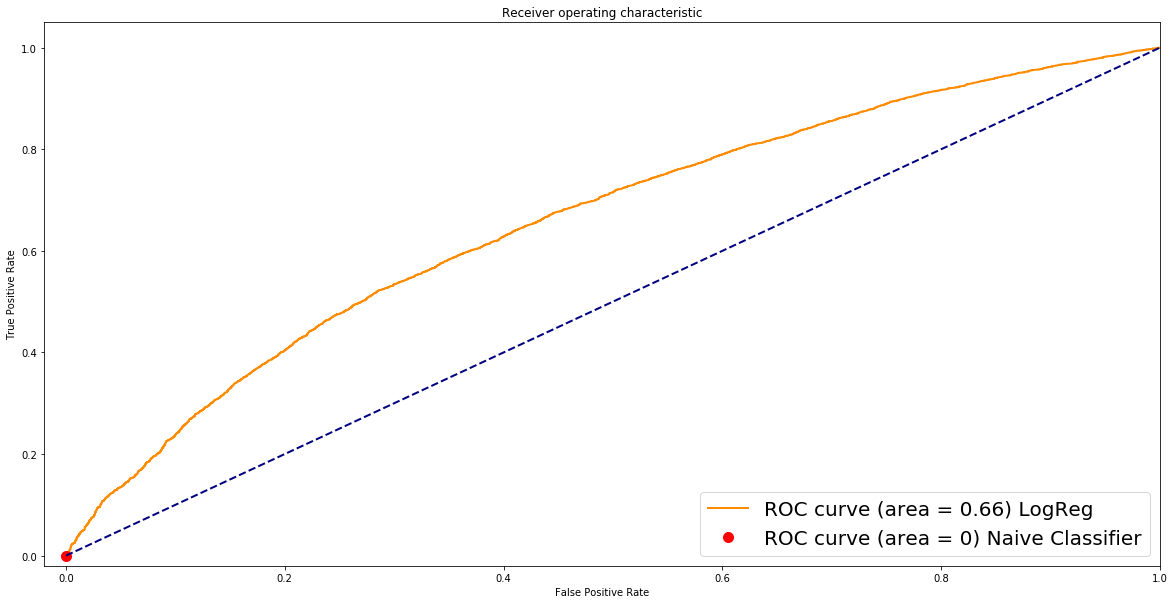

The Area under the curve is:  0.657181933153


In [86]:

preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show() 
print("The Area under the curve is: " , roc_auc)

### Assumptions of Logistic Regression
Logistic Regression Assumptions

Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.


Because logistic regression uses MLE rather than OLS, it avoids many
of the typical assumptions tested in statistical analysis.
Does not assume normality of variables (both DV and IVs).
Does not assume linearity between DV and IVs.
Does not assume homoscedasticity.
Does not assume normal errors.
MLE allows more flexibility in the data and analysis because it has
fewer restrictions.

# Now try it with our ethnicity classifier 

In [181]:
reg1.head()

,GEN16,district,party,Prediction,Race,age,femaleis1
0,1.0,MRT,REP,Jewish,5,67.0,0
1,1.0,CLA,REP,Western European,5,35.0,1
2,0.0,HIL,DEM,Western European,3,20.0,0
3,1.0,MON,NPA,Western European,5,43.0,0
4,1.0,BAK,REP,Western European,5,52.0,0


In [182]:
del reg1["Race"]

In [183]:
datamodel1 = pd.get_dummies(reg1, columns=['district','party', "Prediction"])

In [184]:
## Not an even sample!!! Make train even...

msk = np.random.rand(len(datamodel1)) < 0.5
train = datamodel1[msk]
test = datamodel1[~msk]

train['age']=(train['age']-train['age'].mean())/train['age'].std()
test['age']=(test['age']-train['age'].mean())/train['age'].std()

didntshow = train[train['GEN16']==0]
showed = train[train['GEN16']==1]
didntshow = didntshow.sample(len(didntshow))
showed = showed.sample(len(didntshow))
frames = [didntshow, showed]
train_even = pd.concat(frames)
y_train = train_even['GEN16']
y_test = test['GEN16']
X_train = train_even.drop(['GEN16'], axis = 1)
X_test = test.drop(['GEN16'], axis = 1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


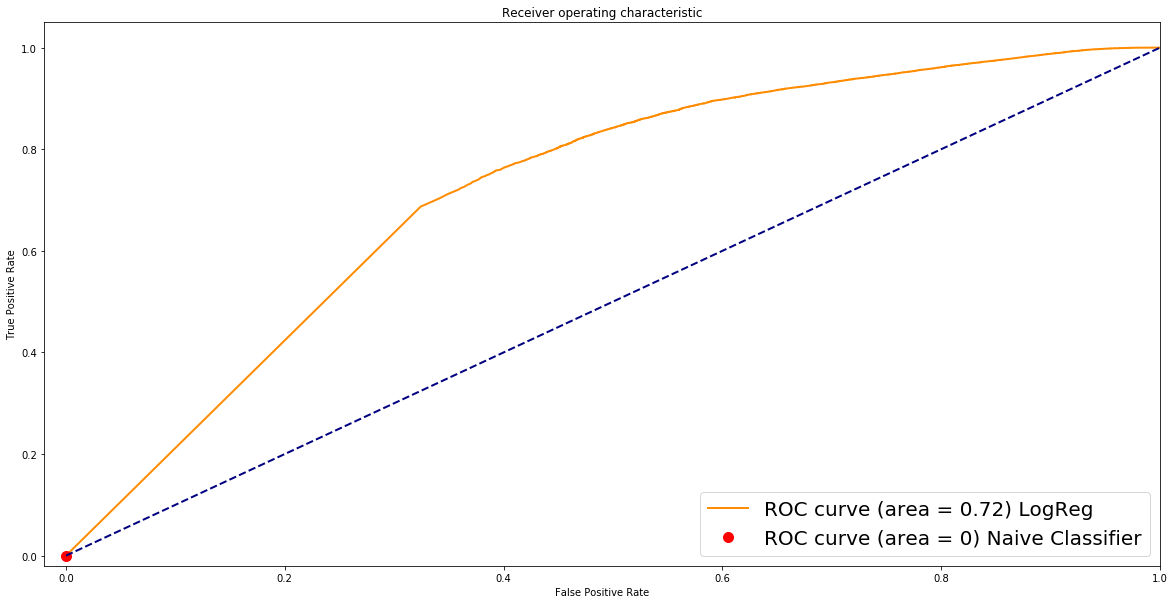

The Area under the curve is:  0.717209746147


In [185]:
#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5, scoring = "roc_auc")
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)

y_hat_test = logit.predict(X_test)

#####
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show() 
print("The Area under the curve is: " , roc_auc)

In [186]:
y_hat_logregmul_train = logit.predict_proba(X_train)[:,1]
y_hat_logregmul_test = logit.predict_proba(X_test)[:,1]

# accuracy
print("logit all predictors accuracy in train = %0.3f" % accuracy_score(y_train, y_hat_logregmul_train>0.5))
print("logit all predictors accuracy in test = %0.3f" % accuracy_score(y_test, y_hat_logregmul_test>0.5))


logit all predictors accuracy in train = 0.708
logit all predictors accuracy in test = 0.838


## Analyzing Significance of Coefficients (on Eth only)

How many of the coefficients estimated by the multiple logistic regression in the previous problem are significantly different from zero at a *significance level of 95%*? 

To answer this question, use *bootstrapping* with 100 boostrap samples/iterations.  



In [187]:
b_genes = logit.coef_[0]
iterations = 100

b_genes_boot = np.zeros((X_train.shape[1],100))

for i in range(iterations):
    # sample with replacement from X_train
    boot_rows = np.random.choice(range(X_train.shape[0]), size=X_train.shape[0], replace=True)
    X_train_boot = X_train.values[boot_rows]
    y_train_boot = y_train.values[boot_rows]

    # fit
    cvals = [1, 10, 100, 10000, 100000]
    ### NOTICE THAT I CHANGED THE SCORING METRIC??
    logregmul_boot = logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5)
    logregmul_boot.fit(X_train_boot, y_train_boot)
    b_genes_boot[:,i] = logregmul_boot.coef_

    
# construct confidence intervals
b_genes_ci_upper = np.percentile(b_genes_boot, 97.5, axis=1)
b_genes_ci_lower = np.percentile(b_genes_boot, 2.5, axis=1)
# ct significant predictors
sig_b_ct = 0

# if ci contains 0, then insignificant
for i in range(X_train.shape[1]):
    if b_genes_ci_upper[i]<0 or b_genes_ci_lower[i]>0:
        sig_b_ct += 1

print("Significant coefficents at 5pct level = %i / %i" % (sig_b_ct, X_train.shape[1]))

Significant coefficents at 5pct level = 22 / 88


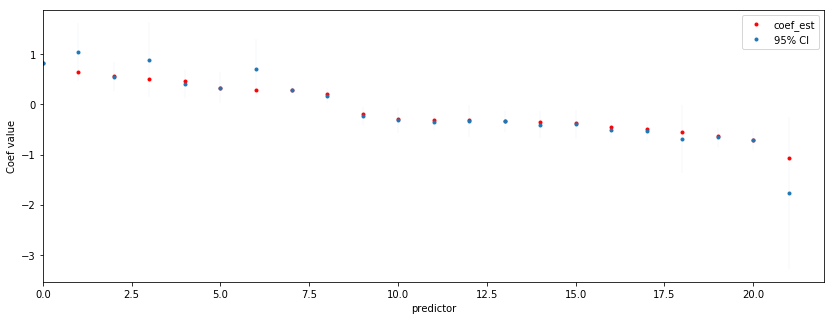

In [188]:
# this plot is not asked for; just for illustration
# to generate a dataframe of the significant predictors only
sig_b = []

# if ci contains 0, then insignificant
for i in range(X_train.shape[1]):
    if b_genes_ci_upper[i]<0 or b_genes_ci_lower[i]>0:
        row={}
        row["predictor"] = X_train.columns[i]
        row["coef"] = b_genes[i]
        row["CI 2.5"] = b_genes_ci_lower[i]
        row["CI 97.5"] = b_genes_ci_upper[i]
        sig_b.append(row)
    
sig_b_df = pd.DataFrame(sig_b)
sig_b_df = sig_b_df.sort_values("coef", ascending=False)
sig_b_df[["predictor","coef","CI 2.5","CI 97.5"]].head()

# plot
plt.figure(figsize=(14,5))
plt.errorbar(range(sig_b_df.shape[0]), 
             0.5*sig_b_df["CI 97.5"]+0.5*sig_b_df["CI 2.5"], 
             yerr=0.5*(sig_b_df["CI 97.5"]-sig_b_df["coef"])+0.5*(sig_b_df["coef"]-sig_b_df["CI 2.5"]),
             fmt='.',
             marker=None,
             elinewidth=0.05,
             label="95% CI"
         )
plt.scatter(range(sig_b_df.shape[0]), sig_b_df["coef"], color='red', label="coef_est", marker='.')
plt.xlim((0,sig_b_df.shape[0]))
plt.xlabel("predictor")
plt.ylabel("Coef value")
plt.legend()

In [189]:
sig_b_df

,CI 2.5,CI 97.5,coef,predictor
0,0.780720,0.864259,0.817647,age
21,0.467524,1.614555,0.640834,party_REP
17,0.267470,0.837844,0.558836,district_SEM
20,0.141848,1.633894,0.499258,party_LPF
10,0.129200,0.688559,0.458487,district_LEO
3,0.019304,0.650841,0.316752,district_CLA
19,0.101940,1.292974,0.286544,party_DEM
1,0.221151,0.363517,0.286309,femaleis1
2,0.021452,0.331647,0.215070,district_BRO
12,-0.406086,-0.052430,-0.182619,district_ORA


# Now try it with our ethnicity classifier AND race

In [191]:
reg.head()

,GEN16,district,party,Prediction,Race,age,femaleis1
0,1.0,MRT,REP,Jewish,5,67.0,0
1,1.0,CLA,REP,Western European,5,35.0,1
2,0.0,HIL,DEM,Western European,3,20.0,0
3,1.0,MON,NPA,Western European,5,43.0,0
4,1.0,BAK,REP,Western European,5,52.0,0


In [192]:
reg1 = reg.dropna(axis=0)
datamodel1 = pd.get_dummies(reg1, columns=['district','party', "Prediction", "Race"])


In [203]:
X_train.shape

(16260, 96)

In [193]:
## Not an even sample!!! Make train even...

msk = np.random.rand(len(datamodel1)) < 0.5
train = datamodel1[msk]
test = datamodel1[~msk]

train['age']=(train['age']-train['age'].mean())/train['age'].std()
test['age']=(test['age']-train['age'].mean())/train['age'].std()

didntshow = train[train['GEN16']==0]
showed = train[train['GEN16']==1]
didntshow = didntshow.sample(len(didntshow))
showed = showed.sample(len(didntshow))
frames = [didntshow, showed]
train_even = pd.concat(frames)
y_train = train_even['GEN16']
y_test = test['GEN16']
X_train = train_even.drop(['GEN16'], axis = 1)
X_test = test.drop(['GEN16'], axis = 1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


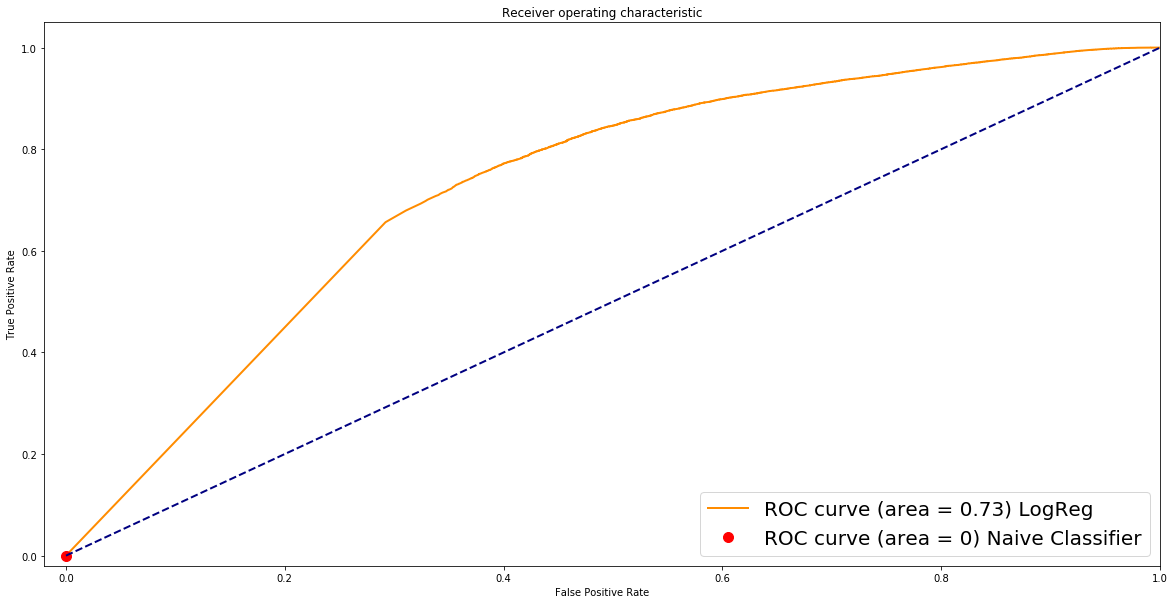

The Area under the curve is:  0.725041300215


In [194]:
#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5, scoring = "roc_auc")
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show() 
print("The Area under the curve is: " , roc_auc)

In [195]:
y_hat_logregmul_train = logit.predict_proba(X_train)[:,1]
y_hat_logregmul_test = logit.predict_proba(X_test)[:,1]

# accuracy
print("logit all predictors accuracy in train = %0.3f" % accuracy_score(y_train, y_hat_logregmul_train>0.5))
print("logit all predictors accuracy in test = %0.3f" % accuracy_score(y_test, y_hat_logregmul_test>0.5))


logit all predictors accuracy in train = 0.709
logit all predictors accuracy in test = 0.838


import numpy as np
from sklearn import linear_model

# Initiate logistic regression object
logit #from above

# Fit model. Let X_train = matrix of predictors, y_train = matrix of variable.
# NOTE: Do not include a column for the intercept when fitting the model.
resLogit = logit.fit(X_train, y_train)

# Calculate matrix of predicted class probabilities. 
# Check resLogit.classes_ to make sure that sklearn ordered your classes as expected
predProbs = np.matrix(resLogit.predict_proba(X_train))

# Design matrix -- add column of 1's at the beginning of your X_train matrix
X_design = np.hstack((np.ones(shape = (len(X_train)))), X_train)

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.matrix(np.zeros(shape = (X_design.shape[0], X_design.shape[0])))
np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)

# Covariance matrix
covLogit = np.linalg.inv(X_design.T * V * X_design)
print("Covariance matrix: ", covLogit)

# Standard errors
print("Standard errors: ", np.sqrt(np.diag(covLogit)))

# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)
print("Wald statistics: ", (logitParams / np.sqrt(np.diag(covLogit))) ** 2)

In [116]:

np.ones(shape = (len(X_train)))

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [130]:
a = logit.fit(X_train, y_train)#.predict(X_test)## wats it doing. 

In [134]:
a.predict_proba(X_train)

array([[ 0.83979887,  0.16020113],
       [ 0.6534929 ,  0.3465071 ],
       [ 0.74363398,  0.25636602],
       ..., 
       [ 0.26912732,  0.73087268],
       [ 0.65902472,  0.34097528],
       [ 0.28650784,  0.71349216]])

## Analyzing Significance of Coefficients (on Eth AND Race)

How many of the coefficients estimated by the multiple logistic regression in the previous problem are significantly different from zero at a *significance level of 95%*? 

To answer this question, use *bootstrapping* with 100 boostrap samples/iterations.  



In [196]:
b_genes = logit.coef_[0]

In [197]:

iterations = 100

b_genes_boot = np.zeros((X_train.shape[1],100))

for i in range(iterations):
    # sample with replacement from X_train
    boot_rows = np.random.choice(range(X_train.shape[0]), size=X_train.shape[0], replace=True)
    X_train_boot = X_train.values[boot_rows]
    y_train_boot = y_train.values[boot_rows]

    # fit
    cvals = [1, 10, 100, 10000, 100000]
    ### NOTICE THAT I CHANGED THE SCORING METRIC??
    logregmul_boot = logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5)
    logregmul_boot.fit(X_train_boot, y_train_boot)
    b_genes_boot[:,i] = logregmul_boot.coef_

    

In [198]:
b_genes_boot

array([[ 0.78653979,  0.79285962,  0.83489288, ...,  0.73402127,
         0.78207301,  0.79182293],
       [ 0.29907634,  0.35511042,  0.32880217, ...,  0.27254191,
         0.30504277,  0.35100012],
       [ 0.58072998,  0.25028144,  0.36391114, ...,  0.34059637,
         0.40951772,  0.5071957 ],
       ..., 
       [ 0.30136705,  0.18132769,  0.15405453, ...,  0.21374413,
         0.30574843,  0.14028309],
       [-0.16135357, -0.26167901, -0.41703881, ..., -0.0254058 ,
        -0.24778485, -0.35838088],
       [-0.26668062, -0.22657247, -0.21395423, ..., -0.1970121 ,
        -0.22889072, -0.16871561]])

In [199]:

# construct confidence intervals
b_genes_ci_upper = np.percentile(b_genes_boot, 97.5, axis=1)
b_genes_ci_lower = np.percentile(b_genes_boot, 2.5, axis=1)

31

In [200]:

# ct significant predictors
sig_b_ct = 0

# if ci contains 0, then insignificant
for i in range(X_train.shape[1]):
    if b_genes_ci_upper[i]<0 or b_genes_ci_lower[i]>0:
        sig_b_ct += 1

print("Significant coefficents at 5pct level = %i / %i" % (sig_b_ct, X_train.shape[1]))

Significant coefficents at 5pct level = 20 / 96


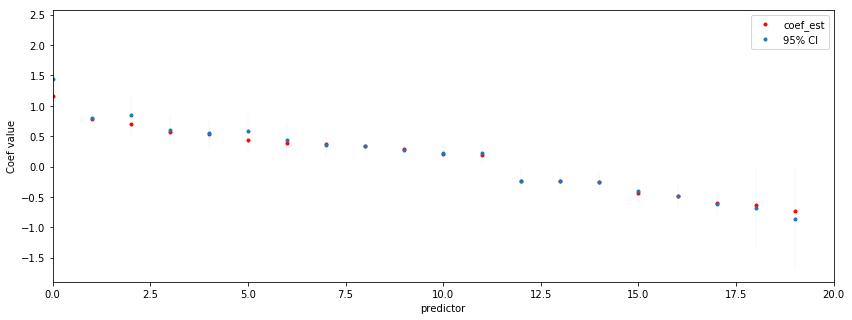

In [201]:
# this plot is not asked for; just for illustration
# to generate a dataframe of the significant predictors only
sig_b = []

# if ci contains 0, then insignificant
for i in range(X_train.shape[1]):
    if b_genes_ci_upper[i]<0 or b_genes_ci_lower[i]>0:
        row={}
        row["predictor"] = X_train.columns[i]
        row["coef"] = b_genes[i]
        row["CI 2.5"] = b_genes_ci_lower[i]
        row["CI 97.5"] = b_genes_ci_upper[i]
        sig_b.append(row)
    
sig_b_df = pd.DataFrame(sig_b)
sig_b_df = sig_b_df.sort_values("coef", ascending=False)
sig_b_df[["predictor","coef","CI 2.5","CI 97.5"]].head()

# plot
plt.figure(figsize=(14,5))
plt.errorbar(range(sig_b_df.shape[0]), 
             0.5*sig_b_df["CI 97.5"]+0.5*sig_b_df["CI 2.5"], 
             yerr=0.5*(sig_b_df["CI 97.5"]-sig_b_df["coef"])+0.5*(sig_b_df["coef"]-sig_b_df["CI 2.5"]),
             fmt='.',
             marker=None,
             elinewidth=0.05,
             label="95% CI"
         )
plt.scatter(range(sig_b_df.shape[0]), sig_b_df["coef"], color='red', label="coef_est", marker='.')
plt.xlim((0,sig_b_df.shape[0]))
plt.xlabel("predictor")
plt.ylabel("Coef value")
plt.legend()

In [202]:
sig_b_df

,CI 2.5,CI 97.5,coef,predictor
15,0.522318,2.375370,1.165604,district_TAY
0,0.750536,0.836013,0.781765,age
17,0.499300,1.202351,0.693909,party_REP
13,0.344593,0.846895,0.570980,district_SEM
9,0.290602,0.805067,0.541775,district_LEO
16,0.241435,0.928902,0.435025,party_DEM
2,0.149225,0.724149,0.394722,district_ALA
6,0.155880,0.557347,0.378957,district_DUV
1,0.279152,0.407757,0.332404,femaleis1
18,0.165310,0.394376,0.282395,Race_5
